<a href="https://colab.research.google.com/github/masha713/numerical-methods/blob/master/%D0%9F%D1%96%D0%B4%D1%81%D1%83%D0%BC_%D0%B7%D0%B0%D0%B2%D0%B4%2C_%D0%94%D0%B5%D0%BC%D0%B5%D1%88%D0%BE%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Побудувати інтерполяційний багаточлен для всіх вузлів таблиці.

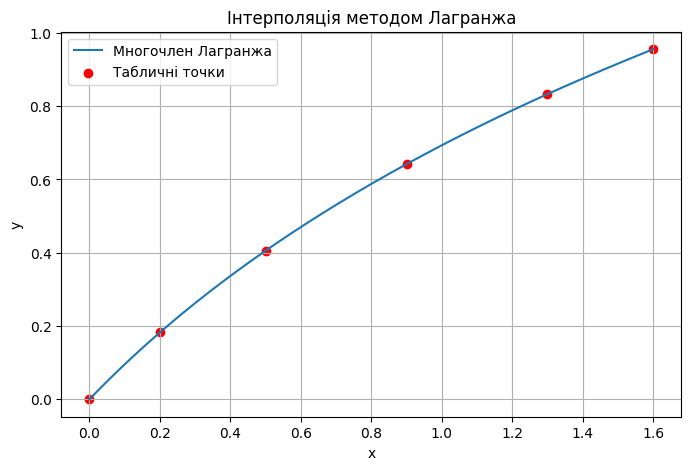

Коэффициенты многочлена:
         5           4          3         2
0.01552 x - 0.09163 x + 0.2485 x - 0.477 x + 0.9978 x


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

x = np.array([0.0, 0.2, 0.5, 0.9, 1.3, 1.6])
y = np.array([0.000000, 0.182322, 0.405465, 0.641854, 0.832909, 0.955511])

P = lagrange(x, y)
xs = np.linspace(0, 1.6, 400)
ys = P(xs)

plt.figure(figsize=(8,5))
plt.plot(xs, ys, label="Многочлен Лагранжа")
plt.scatter(x, y, color="red", label="Табличні точки")
plt.grid(True)
plt.legend()
plt.title("Інтерполяція методом Лагранжа")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("Коэффициенты многочлена:")
print(P)

2.Побудувати інтерполяційний багаточлен Ньютона з використанням таблиці кінцевих функцій.

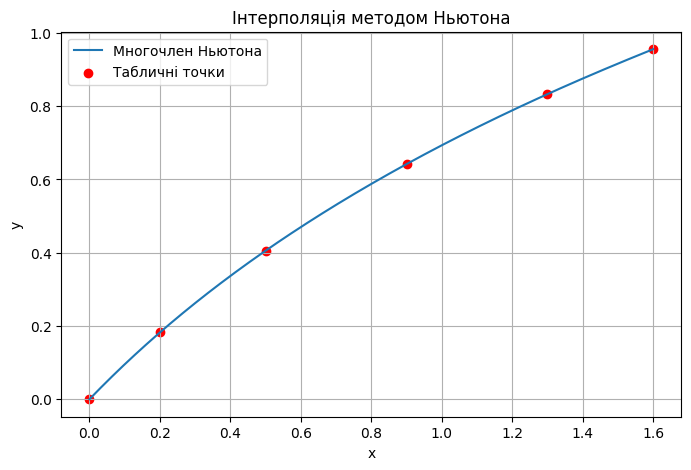

Коефіцієнти (розділені різниці):
[ 0.          0.91161    -0.3356      0.13028968 -0.04660707  0.0155247 ]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Табличні значення (функція задана таблично)
x = np.array([0.0, 0.2, 0.5, 0.9, 1.3, 1.6])
y = np.array([0.000000, 0.182322, 0.405465, 0.641854, 0.832909, 0.955511])

def divided_differences(x, y):
    n = len(x)
    coef = np.copy(y)
    for j in range(1, n):
        coef[j:n] = (coef[j:n] - coef[j-1:n-1]) / (x[j:n] - x[0:n-j])
    return coef

def newton_polynomial(coef, x_nodes, x_val):
    n = len(coef)
    p = coef[-1]
    for k in range(2, n+1):
        p = coef[-k] + (x_val - x_nodes[-k]) * p
    return p


# Коефіцієнти многочлена Ньютона
coef = divided_differences(x, y)

xs = np.linspace(0, 1.6, 400)
ys = newton_polynomial(coef, x, xs)

plt.figure(figsize=(8,5))
plt.plot(xs, ys, label="Многочлен Ньютона")
plt.scatter(x, y, color="red", label="Табличні точки")
plt.grid(True)
plt.legend()
plt.title("Інтерполяція методом Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Вивід коефіцієнтів
print("Коефіцієнти (розділені різниці):")
print(coef)

3.Побудувати ряд Тейлора 3-го порядку для аналітичної функції.

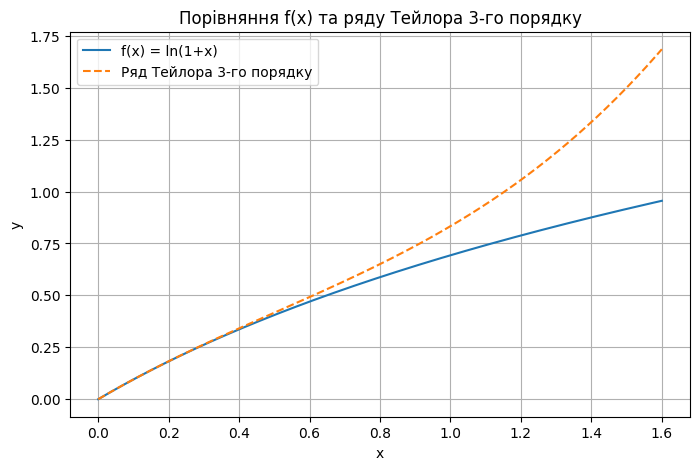

Максимальна похибка на [0, 1.6]: 0.7298218883058972


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.log(1 + x)

# Ряд Тейлора 3-го порядку для ln(1+x) при x0 = 0
def T3(x):
    return x - x**2/2 + x**3/3

xs = np.linspace(0, 1.6, 400)

ys_true = f(xs)
ys_taylor = T3(xs)

# Графік
plt.figure(figsize=(8,5))
plt.plot(xs, ys_true, label="f(x) = ln(1+x)")
plt.plot(xs, ys_taylor, linestyle="--", label="Ряд Тейлора 3-го порядку")
plt.grid(True)
plt.legend()
plt.title("Порівняння f(x) та ряду Тейлора 3-го порядку")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Максимальна похибка
error = np.abs(ys_true - ys_taylor)
print("Максимальна похибка на [0, 1.6]:", np.max(error))

4.Побудувати кубічний сплайн.

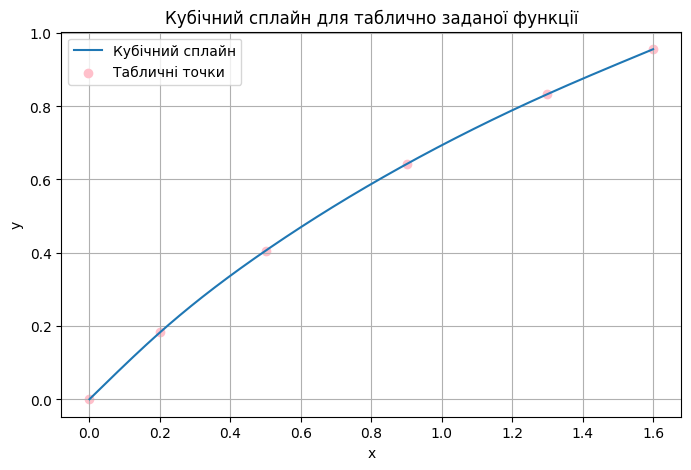

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Табличні значення
x = np.array([0.0, 0.2, 0.5, 0.9, 1.3, 1.6])
y = np.array([0.000000, 0.182322, 0.405465, 0.641854, 0.832909, 0.955511])

spline = CubicSpline(x, y, bc_type='natural')

xs = np.linspace(0, 1.6, 400)
ys = spline(xs)

# Графік
plt.figure(figsize=(8,5))
plt.plot(xs, ys, label="Кубічний сплайн")
plt.scatter(x, y, color="pink", label="Табличні точки")
plt.grid(True)
plt.legend()
plt.title("Кубічний сплайн для таблично заданої функції")
plt.xlabel("x")
plt.ylabel("y")
plt.show()